### IMPORTING LIBRARIES

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the CSV File
pp_data = pd.read_csv('preprocessed_dataset/preprocessed_adult_data.csv')
pp_data

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,-0.996774,2.071891,-0.316067,-0.727621,0.597698,-0.358419,-0.265777,0.704762,1.0
1,-0.996774,-0.615995,1.176747,-0.112953,0.597698,-0.358419,-0.265777,0.704762,-1.0
2,1.121885,2.071891,1.176747,-0.112953,-1.673087,-0.358419,-0.265777,0.704762,1.0
3,1.529319,-0.232012,-0.316067,-0.727621,0.597698,-0.358419,-0.265777,-0.221416,1.0
4,-0.344879,1.303924,1.176747,-0.112953,0.597698,3.240058,-0.265777,0.241673,1.0
...,...,...,...,...,...,...,...,...,...
22399,-0.344879,0.919940,-0.316067,-0.727621,0.597698,-0.358419,-0.265777,0.704762,1.0
22400,0.551477,1.303924,-1.808881,1.731053,-1.673087,-0.358419,-0.265777,-0.221416,1.0
22401,-0.018931,-0.615995,-0.316067,-0.727621,0.597698,-0.358419,-0.265777,-0.221416,-1.0
22402,-0.018931,-0.615995,-1.808881,-0.112953,0.597698,-0.358419,-0.265777,-0.684505,-1.0


#### NORMALIZATION (Scaling of values - StandardScalar)

In [3]:
X = pp_data[['age', 'education-num', 'marital-status', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = pp_data['income']

### TRAIN/TEST SPLIT

In [9]:
# Splitting train, test variables, where test is 20% of the dataframe.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
X_train.shape, X_test.shape

((17923, 8), (4481, 8))

In [11]:
X_train.head()

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week
4739,0.551477,1.303924,-0.316067,2.345722,-1.673087,2.853224,-0.265777,-0.406652
5163,-0.670826,-0.615995,-0.316067,-0.727621,0.597698,-0.358419,-0.265777,-0.221416
21981,1.121885,0.919940,-0.316067,-0.727621,0.597698,-0.358419,-0.265777,2.557118
3965,0.144042,0.919940,-0.316067,-0.727621,0.597698,-0.358419,3.901394,-0.221416
12465,2.181214,0.919940,-1.808881,-0.112953,0.597698,-0.358419,-0.265777,-0.221416


### MODEL TRAINING & MODEL PERFORMANCE METRICS

### NAÏVE BAYES

In [4]:
# Creating a Gaussian Classifier
model = GaussianNB()

# PowerTransformer for Gaussian-like feature distributions
power_transformer = PowerTransformer()
X_transformed = power_transformer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42) 

# Train the model using the training sets
gnb = model.fit(X_train,y_train)

# Predictions on the test set
gnb_predictions = gnb.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:")
print(classification_report(y_test, gnb_predictions))

Naïve Bayes Classifier:
Accuracy: 0.7873242579781299
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.81      0.77      0.79      2276
         1.0       0.77      0.81      0.79      2205

    accuracy                           0.79      4481
   macro avg       0.79      0.79      0.79      4481
weighted avg       0.79      0.79      0.79      4481



In [5]:
model.score(X_train, y_train)

0.7774926072644088

In [6]:
model.score(X_test, y_test)

0.7873242579781299

Random Prediction: ROC AUC=0.500
Naïve Bayes: ROC AUC=0.857


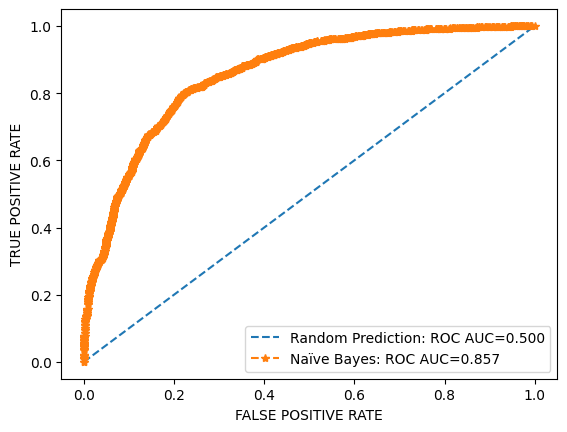

In [7]:
# Predict probabilities
nb_probs = model.predict_proba(X_test)

# Keep probabilities for the positive outcome only
nb_probs1 = nb_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naïve Bayes: ROC AUC=%.3f' % (nb_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naïve Bayes: ROC AUC=%.3f' % (nb_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()


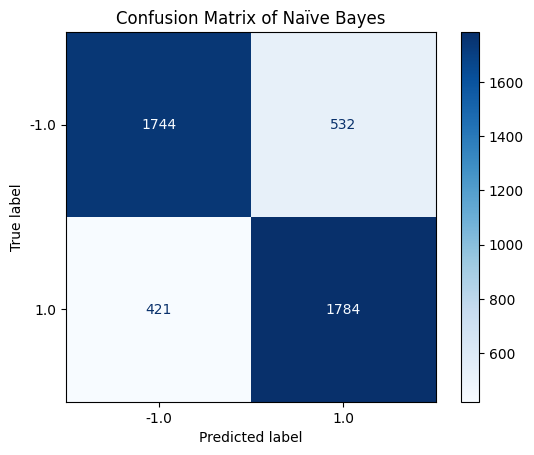

In [8]:
# Display the confusion matrix
cm = confusion_matrix(y_test, gnb_predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Naïve Bayes")
plt.show()

### RANDOM FOREST

In [44]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}

# Initialize the classifier
random= RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.826145822973471


In [45]:
# Evaluate Naïve Bayes Classifier
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.8232537380049096
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.87      0.77      0.82      2276
         1.0       0.79      0.88      0.83      2205

    accuracy                           0.82      4481
   macro avg       0.83      0.82      0.82      4481
weighted avg       0.83      0.82      0.82      4481



In [46]:
grid_search.score(X_train, y_train)

0.8384199073815768

In [47]:
grid_search.score(X_test, y_test)

0.8232537380049096

Random Prediction: ROC AUC=0.500
Random Forest: ROC AUC=0.910


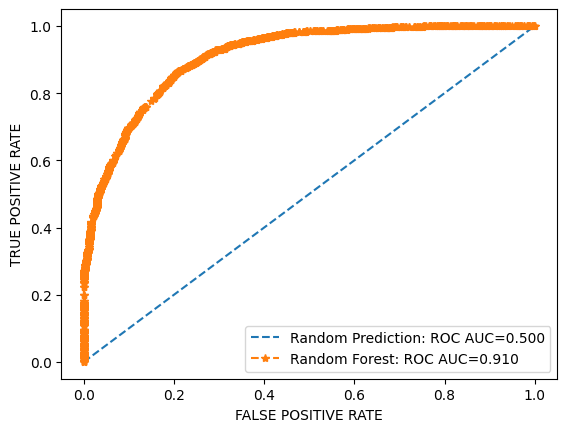

In [49]:
# Predict probabilities
rf_probs = grid_search.predict_proba(X_test)
# Keep probabilities for the positive outcome only
rf_probs1 = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()

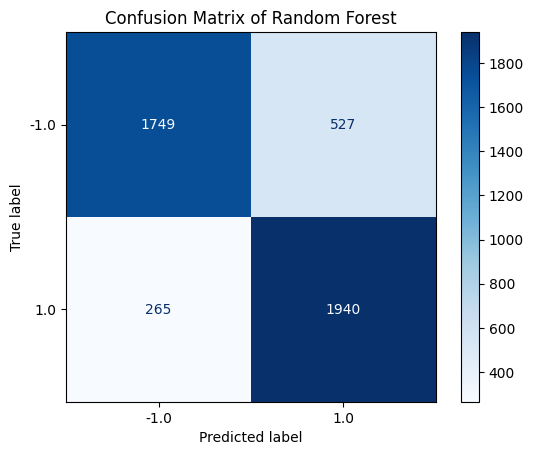

In [50]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Random Forest")
plt.show()

### COMPARING THE TWO MODELS

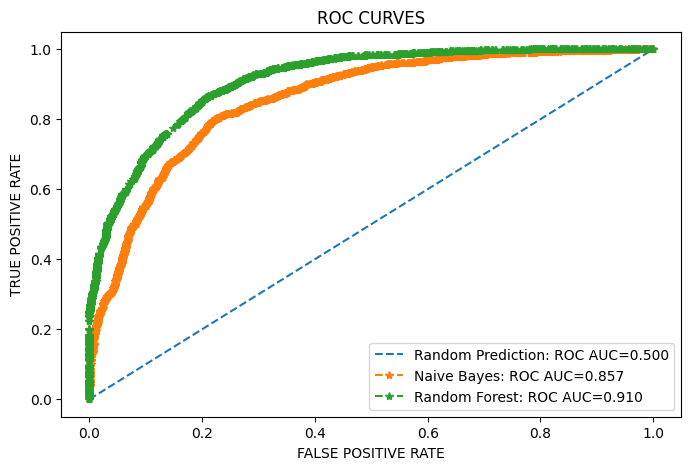

In [51]:
plt.figure(figsize=(8,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))

plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVES')
plt.legend()
plt.show()

In [52]:
random_forest_accuracy = grid_search.score(X_test, y_test)
naïve_bayes_accuracy = model.score(X_test, y_test)

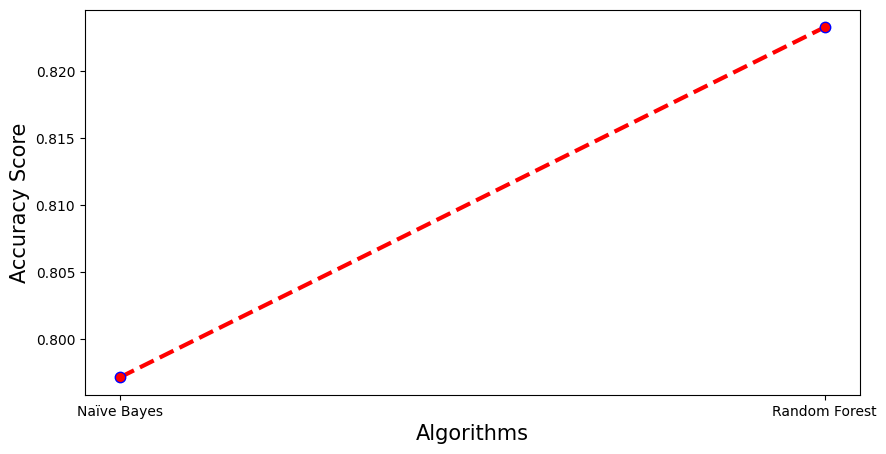

In [53]:
# Comparing Different algorithm models with their respective accuracy.
x=['Naïve Bayes','Random Forest']
y=[naïve_bayes_accuracy, random_forest_accuracy]

plt.figure(1,figsize=(10,5))

plt.plot(x,y,label='line width is 5x',linewidth=3,linestyle="--",color="red",marker='.',markersize=15,markeredgecolor="blue")
plt.xlabel("Algorithms",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)

plt.show() 